# String/Array Manipulation


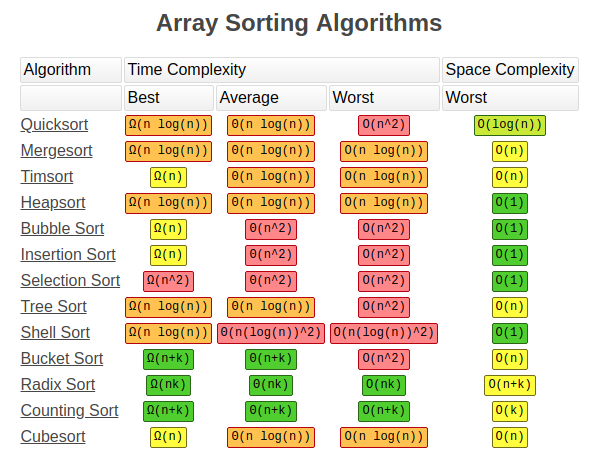

### Bottom Up Mergesort

Merge sort is a perfectly elegant example of a Divide and Conquer algorithm. It simple uses the 2 main steps of such an algorithm:

(1) Continuously divide the unsorted list until you have N sublists, where each sublist has 1 element that is “unsorted” and N is the number of elements in the original array.

(2) Repeatedly merge i.e conquer the sublists together 2 at a time to produce new sorted sublists until all elements have been fully merged into a single sorted array.

In [1]:
def merge_sort(arr):
    
    # The last array split
    if len(arr) <= 1:
        return arr
    
    #find middle of array given, can use this index to split the array in half
    mid = len(arr) // 2
    
    # Perform merge_sort recursively on both halves
    left, right = merge_sort(arr[:mid]), merge_sort(arr[mid:])

    # Merge each side together
    return merge(left, right, arr.copy())


def merge(left, right, merged):

    left_cursor, right_cursor = 0, 0
    while left_cursor < len(left) and right_cursor < len(right):
      
        # Sort each one and place into the result
        if left[left_cursor] <= right[right_cursor]:
            merged[left_cursor+right_cursor]=left[left_cursor]
            left_cursor += 1
        else:
            merged[left_cursor + right_cursor] = right[right_cursor]
            right_cursor += 1
            
    for left_cursor in range(left_cursor, len(left)):
        merged[left_cursor + right_cursor] = left[left_cursor]
        
    for right_cursor in range(right_cursor, len(right)):
        merged[left_cursor + right_cursor] = right[right_cursor]

    return merged

### Quicksort

Quick sort is also a divide and conquer algorithm like merge sort. Although it’s a bit more complicated, in most standard implementations it performs significantly faster than merge sort and rarely reaches its worst case complexity of O(n²). It has 3 main steps:

(1) We first select an element which we will call the pivot from the array.

(2) Move all elements that are smaller than the pivot to the left of the pivot; move all elements that are larger than the pivot to the right of the pivot. This is called the partition operation.

(3) Recursively apply the above 2 steps separately to each of the sub-arrays of elements with smaller and bigger values than the last pivot.

In [2]:
def partition(array, begin, end):
    pivot_idx = begin
    for i in xrange(begin+1, end+1):
        if array[i] <= array[begin]:
            pivot_idx += 1
            array[i], array[pivot_idx] = array[pivot_idx], array[i]
    array[pivot_idx], array[begin] = array[begin], array[pivot_idx]
    return pivot_idx

def quick_sort_recursion(array, begin, end):
    if begin >= end:
        return
    pivot_idx = partition(array, begin, end)
    quick_sort_recursion(array, begin, pivot_idx-1)
    quick_sort_recursion(array, pivot_idx+1, end)

def quick_sort(array, begin=0, end=None):
    if end is None:
        end = len(array) - 1
    
    return quick_sort_recursion(array, begin, end)

### Priority Queues

### Double-ended Queues

### Stacks

### Permuatation/Combination

Permutation: all possible sets in all possible orders. (order matters)

Combination: all possible sets with no duplicates. (order doesn't matter)

In [4]:
from itertools import combinations
# Get all permutations of [1, 2, 3] 
perm = permutations([1, 2, 3])

from itertools import permutations
# Get all combinations of [1, 2, 3] 
# and length 2 
comb = combinations([1, 2, 3], 2) 

### Suffix Array (Manber/Meyers)

### KMP Algorithm

Given a text txt[0..n-1] and a pattern pat[0..m-1], write a function search(char pat[], char txt[]) that prints all occurrences of pat[] in txt[]. You may assume that n > m.

Input: 

txt[] =  "AABAACAADAABAABA"
        
pat[] =  "AABA"

Output:

Pattern found at index 0

Pattern found at index 9

Pattern found at index 12

In [2]:
class KMP:
    def partial(self, pattern):
        """ Calculate partial match table: String -> [Int]"""
        ret = [0]
        
        for i in range(1, len(pattern)):
            j = ret[i - 1]
            while j > 0 and pattern[j] != pattern[i]:
                j = ret[j - 1]
            ret.append(j + 1 if pattern[j] == pattern[i] else j)
        return ret
        
    def search(self, T, P):
        """ 
        KMP search main algorithm: String -> String -> [Int] 
        Return all the matching position of pattern string P in S
        """
        partial, ret, j = self.partial(P), [], 0
        
        for i in range(len(T)):
            while j > 0 and T[i] != P[j]:
                j = partial[j - 1]
            if T[i] == P[j]: j += 1
            if j == len(P): 
                ret.append(i - (j - 1))
                #j = 0
                j = partial[j - 1]
            
        return ret

# Problems that may use these

Subarray related problems, subsequence problems, log-search techniques
interval problems

PRACTICE  ON MEDIUM YOURE USING. PROBABLY WHITEBOARD